El conjunto de datos Fashion-MNIST es un conjunto de datos de imágenes de
artículos de Zalando, con imágenes en escala de grises de 28x28 de 70 000
productos de moda de 10 categorías y 7000 imágenes por categoría. El
conjunto de entrenamiento tiene 60.000 imágenes y el conjunto de prueba
tiene 10.000 imágenes. ¡Puede verificar esto más tarde cuando haya cargado
sus datos! ;)

Cargar los datos

Keras viene con una biblioteca llamada datasets, que puede usar para cargar
conjuntos de datos listos para usar: descarga los datos del servidor y acelera
el proceso, ya que ya no tiene que descargar los datos a su computadora. Las
imágenes del tren y de la prueba, junto con las etiquetas, se cargan y
almacenan en las variables train_X, train_Y, test_X, test_Y, respectivamente.

In [42]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Realice lo siguiente:
1. Obtenga el tamaño de los datos de test y testeo, además de las
dimensiones de las imágenes.

In [9]:
print('Tamaño de los datos test X: ', len(test_X))
print('Tamaño de los datos test Y: ', len(test_Y))
print('Tamaño de los datos testeo X: ', len(train_X))
print('Tamaño de los datos testeo Y: ', len(train_Y))

Tamaño de los datos test X:  10000
Tamaño de los datos test Y:  10000
Tamaño de los datos testeo X:  60000
Tamaño de los datos testeo Y:  60000


In [11]:
print('Dimensiones de las imagenes de testeo X: ', train_X.shape)
print('Dimensiones de las imagenes de testeo Y: ', train_Y.shape)
print('Dimensiones de las imagenes de test X: ', test_X.shape)
print('Dimensiones de las imagenes de test Y: ', test_Y.shape)

Dimensiones de las imagenes de testeo X:  (60000, 28, 28)
Dimensiones de las imagenes de testeo Y:  (60000,)
Dimensiones de las imagenes de test X:  (10000, 28, 28)
Dimensiones de las imagenes de test Y:  (10000,)


2. Obtenga las categorías de la base

In [12]:
train_Y[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [13]:
test_Y[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [102]:
# find the unique labels (as numbers in this case)
labels_unique = np.unique(train_Y)
# find the total number of unique classes
num_classes = len(labels_unique)

print('Numero total de clases : ', num_classes)
print('Niveles unicos : ', labels_unique)

Numero total de clases :  10
Niveles unicos :  [0 1 2 3 4 5 6 7 8 9]


3. Visualice sus datos.

Text(0.5, 1.0, 'Ground Truth : 7')

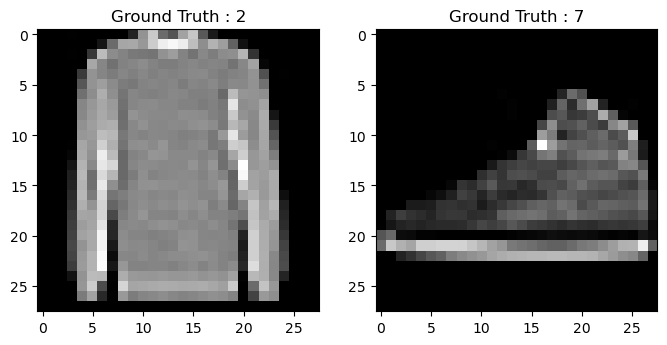

In [15]:
# set the size of the output thumbnail
plt.figure(figsize=[8,8])
# image and label choice
choice = 45
# Display the first image in training data
plt.subplot(1,2,1)
# subplot 1, 2, 1 is a 1 row by 2 column plot in position 1 (upper left)

# grab the 45th image in the array, ignore the other dimensions of the shape
plt.imshow(train_X[choice,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[choice]))

# Display the first image in testing data
plt.subplot(122)
# subplot 1, 2, 2 is a 1 row by 2 column plot in position 2 (upper right)

# grab the 45th image in the array, ignore the other dimensions of the shape
plt.imshow(test_X[choice,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[choice]))

4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.

In [16]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
train_X.dtype

dtype('uint8')

5. Convierta las etiquetas de entrenamiento y prueba en vectores de codificación one-hot.

In [19]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
test_X[9000,27,15]

array([138.], dtype=float32)

In [20]:
train_X = train_X / 255
test_X = test_X / 255
test_X[9000,27,15]

array([0.5411765], dtype=float32)

In [104]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Let's pick a random image, 4738 and see what category it is:
print('Nivel Original:', train_Y[4738])
# Let's convert the label into "one-hot-encoded" array
print('Despues de la conversion one-hot:', train_Y_one_hot[4738])

# Here we see the label is 4 (coat), and the 4th position is "1" or "true"

Nivel Original: 4
Despues de la conversion one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Text(0.5, 1.0, 'Ground Truth : 4')

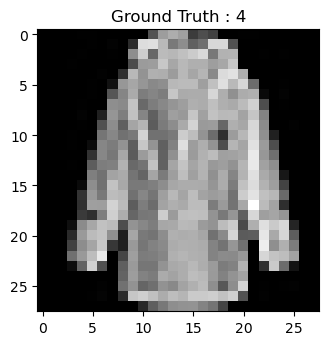

In [22]:
plt.figure(figsize=[8,8])
choice = 4738
plt.subplot(1,2,1)
plt.imshow(train_X[choice,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[choice]))

6. Separar datos de entrenamiento y testeo

In [105]:
print('Forma:', train_X.shape)
print('Forma:', train_Y_one_hot.shape)

Forma: (48000, 28, 28)
Forma: (60000, 10)


In [24]:
from sklearn.model_selection import train_test_split
# we split the set of training images and the encoded training labels into an 80/20 split

# the random state variable can be any integer, once an integer is chosen it is the seed of the random number 
# generator.  Setting this variable once allows you to run your code multiple times to get the same result
# otherwise you would get a new random seed each time which would not allow you to truly see the history 
# of any changes you've made in the previous code.
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [106]:
print('Froma del set de entrenmiento:', train_X.shape)
print('Validacion del set de entrenamiento:', valid_X.shape)
print('Forma del set del nivel de entrenamiento:', train_label.shape)
print('Validacion de set del nivel:', valid_label.shape)

Froma del set de entrenmiento: (48000, 28, 28)
Validacion del set de entrenamiento: (12000, 28, 28, 1)
Forma del set del nivel de entrenamiento: (48000, 10)
Validacion de set del nivel: (12000, 10)


7. Para modelar sus datos, utilice los siguientes paquetes:

In [44]:
import keras

In [67]:
pip install keras-models

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [76]:
from keras.models import Sequential,Model
#from keras.models import Sequential,Input,Model

In [77]:
from tensorflow.keras import Input

In [70]:
from keras.layers import Dense, Dropout, Flatten

In [72]:
from keras.layers import Conv2D, MaxPooling2D

In [83]:
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization

In [87]:
from tensorflow.keras.layers import LeakyReLU
#from keras.layers.advanced_activations import LeakyReLU

Usará un tamaño de lote de 64 y también es preferible usar un tamaño
de lote más alto de 128 o 256, todo depende de la memoria. Contribuye
enormemente a determinar los parámetros de aprendizaje y afecta la
precisión de la predicción. Entrenarás la red durante 20 épocas.

In [88]:
batch_size = 64
epochs = 20
num_classes = 10

In [89]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [91]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

8. Agregue la capa de agrupación máxima con MaxPooling2D() y así
sucesivamente.

conv2d (3, 3, 1, 32)


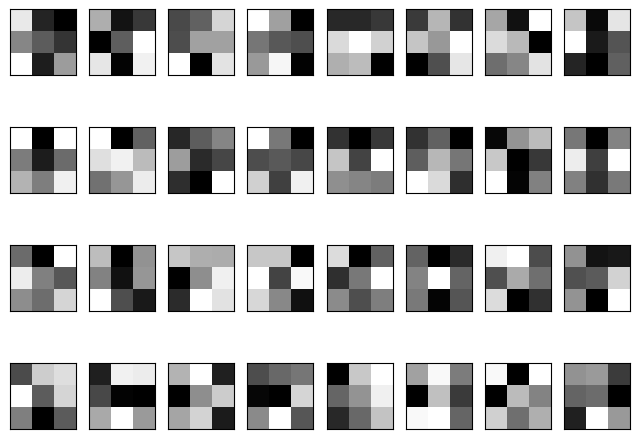

In [92]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = fashion_model.layers #Conv layers at 0, 
filters, biases = fashion_model.layers[0].get_weights()
print(layer[0].name, filters.shape)

# plot filters
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer 
for i in range(1, n_filters + 1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

9. Compilación y visualización del modelo

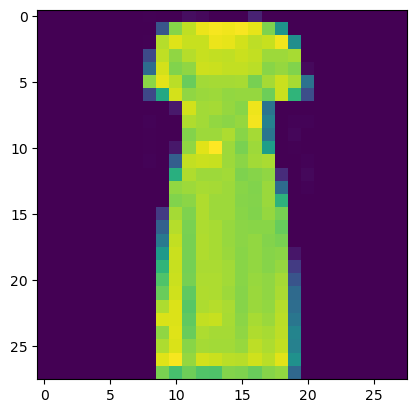

In [93]:
choice = 50
img = train_X[choice,:,:]
plt.imshow(img)

1/1 [==============================] - 0s 451ms/step


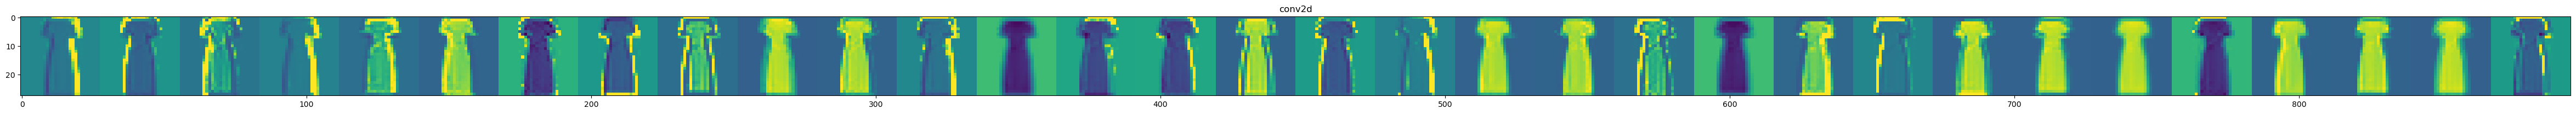

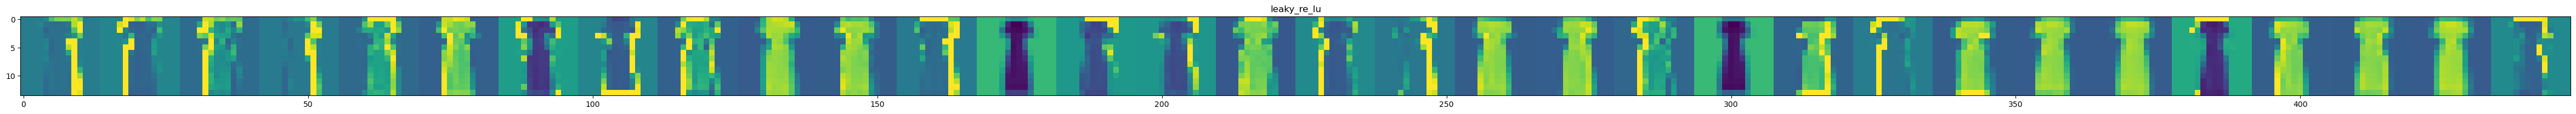

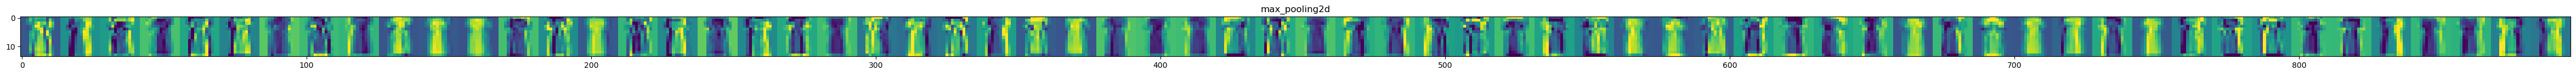

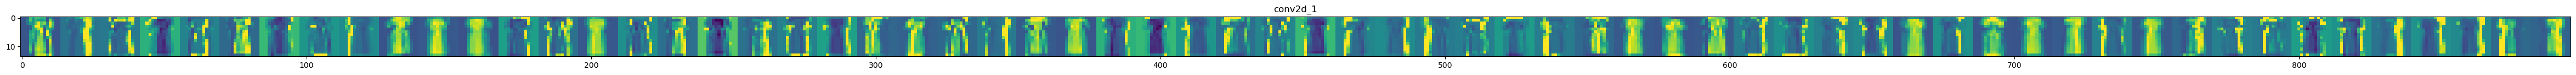

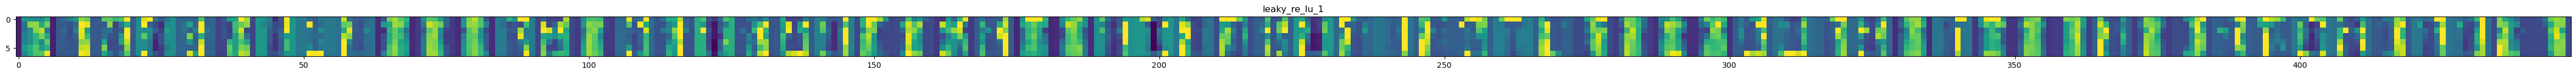

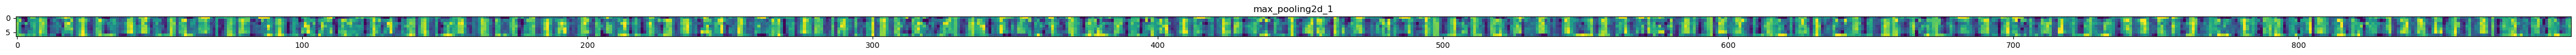

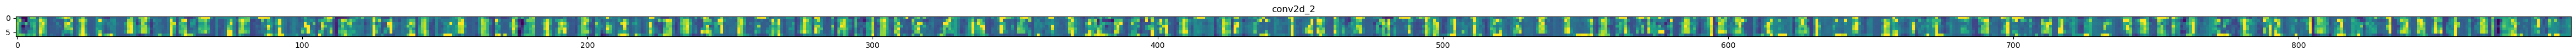

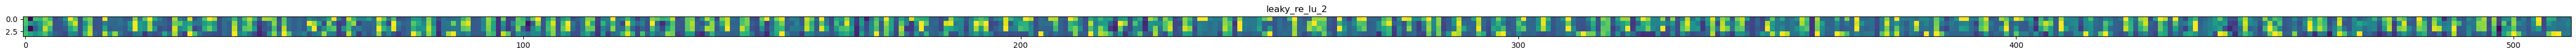

In [94]:
import tensorflow as tf

successive_outputs = [layer.output for layer in fashion_model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)

visualization_model = tf.keras.models.Model(inputs = fashion_model.input, outputs = successive_outputs)
#Load the input image
img = train_X[choice,:,:]

# Convert ht image to Array of dimension (150,150,3)
x   = tf.keras.preprocessing.image.img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255

x /= 255.0
# Let's run input image through our visualization network
# to obtain all intermediate representations for the image.

successive_feature_maps = visualization_model.predict(x)

# Retrieve the names of the layers for the plot

layer_names = [layer.name for layer in fashion_model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  #print(feature_map.shape)
# We need to generate feature maps of only convolution layers 
# and not dense layers and hence we will generate feature maps 
# of layers that have “dimension=4″ - see summary,
# dense layers have 2 dimensions while conv layers have 4

  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
        
      # Tile each filter into a horizontal grid
    
      display_grid[:, i * size : (i + 1) * size] = x
        
# Display the grid
    scale = 60. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [101]:
train_X = train_X[:48000]
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 39s 51ms/step - loss: 2.5930 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.0992
Epoch 2/20
750/750 [==============================] - 44s 58ms/step - loss: 2.3054 - accuracy: 0.1061 - val_loss: 2.3029 - val_accuracy: 0.0992
Epoch 3/20
750/750 [==============================] - 44s 59ms/step - loss: 2.3028 - accuracy: 0.1106 - val_loss: 2.3031 - val_accuracy: 0.0992
Epoch 4/20
750/750 [==============================] - 43s 58ms/step - loss: 2.3015 - accuracy: 0.1145 - val_loss: 2.3029 - val_accuracy: 0.0992
Epoch 5/20
750/750 [==============================] - 43s 57ms/step - loss: 2.3005 - accuracy: 0.1140 - val_loss: 2.3032 - val_accuracy: 0.0992
Epoch 6/20
750/750 [==============================] - 43s 57ms/step - loss: 2.2975 - accuracy: 0.1177 - val_loss: 2.3033 - val_accuracy: 0.0992
Epoch 7/20
750/750 [==============================] - 46s 62ms/step - loss: 2.2957 - accuracy: 0.1238 - val_loss: 2.3031 - val_accuracy: